In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score, RocCurveDisplay, PrecisionRecallDisplay, roc_curve, confusion_matrix, classification_report, mean_squared_error, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from datetime import timedelta
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV #GridSearch is for hyperparameter tuning
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [4]:
file_path = '/Users/steven.souksavath/Downloads/Archive (4)/train.csv'
df = pd.read_csv(file_path, delimiter=';')

In [5]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [6]:
#Check Data ranges for the numerical columns 
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


Data Distribution Observations

In [12]:
#Single people have highest chance of subscribing
df.groupby(['marital'], as_index=False)['y'].mean()

,marital,y
0,divorced,0.119455
1,married,0.101235
2,single,0.149492


In [13]:
#Higher chance of people without a mortgage subscribing to a term deposit
df.groupby(['housing'], as_index=False)['y'].mean()

,housing,y
0,no,0.167024
1,yes,0.077000


In [14]:
#People with laosn see similar results
df.groupby(['loan'], as_index=False)['y'].mean()

,loan,y
0,no,0.126557
1,yes,0.066814


In [15]:
#Those who are retired or a student will have the highest chance of subscribing to a term deposit -- C
df.groupby(['job'], as_index=False)['y'].mean()

,job,y
0,admin.,0.122027
1,blue-collar,0.072750
2,entrepreneur,0.082717
3,housemaid,0.087903
4,management,0.137556
5,retired,0.227915
6,self-employed,0.118429
7,services,0.088830
8,student,0.286780
9,technician,0.110570


In [16]:
#When point of contact was used, led to higher chance of the user subscribing 
df.groupby(['contact'], as_index=False)['y'].mean()

,contact,y
0,cellular,0.149189
1,telephone,0.134205
2,unknown,0.040707


In [17]:
#People who got their undergrad or post grad have the highest chance of subscribing to a term deposit
df.groupby(['education'], as_index=False)['y'].mean()

,education,y
0,primary,0.086265
1,secondary,0.105594
2,tertiary,0.150064
3,unknown,0.135703


In [18]:
#Highest months were march, october, september, december
df.groupby(['month'], as_index=False)['y'].mean()

,month,y
0,apr,0.196794
1,aug,0.110133
2,dec,0.467290
3,feb,0.166478
4,jan,0.101212
5,jul,0.090935
6,jun,0.102228
7,mar,0.519916
8,may,0.067195
9,nov,0.101511


In [19]:
#First and the 9th of the month saw the highest percentage chance to subscribe
df.groupby(['day'], as_index=False)['y'].mean()

,day,y
0,1,0.279503
1,2,0.140758
2,3,0.164968
3,4,0.159170
4,5,0.112565
5,6,0.093685
6,7,0.086406
7,8,0.109121
8,9,0.114670
9,10,0.230916


In [20]:
# Come back to THISSSS

df['age_cut'] = pd.qcut(df['age'], 6)

In [21]:
#Individuals aged 52+ and under 31 were most likely to subscribe to a term deposit
df.groupby(['age_cut'], as_index=False)['y'].mean()

/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_78698/1308152034.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_cut'], as_index=False)['y'].mean()


,age_cut,y
0,"(17.999, 31.0]",0.149679
1,"(31.0, 35.0]",0.106332
2,"(35.0, 39.0]",0.101007
3,"(39.0, 45.0]",0.087691
4,"(45.0, 52.0]",0.092045
5,"(52.0, 95.0]",0.155373


In [22]:
#Success of the marketing campaign only accounts for 65% of users that will subscribe
df.groupby(['poutcome'], as_index=False)['y'].mean()

,poutcome,y
0,failure,0.126097
1,other,0.166848
2,success,0.647253
3,unknown,0.091615


In [23]:
# Isolate for duration above 537 as they see the highest percentage chance of subscribing to the term deposit - MORE EDA to see the data more clearly for the target 
# As duration had the highest correlation with the outcome variable. We can observe the longer the marketing ccampaign call went (higher duration), the greater the chances the
# the user will subscribe to the term deposit
df.groupby(['y'], as_index=False)['duration'].mean()

,y,duration
0,0,221.182806
1,1,537.294574


In [24]:
duration_df = df[df['duration'] >= 537]
duration_df['y'].value_counts().reset_index()
duration_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cut
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,0,"(52.0, 95.0]"
38,36,admin.,divorced,secondary,no,506,yes,no,unknown,5,may,577,1,-1,0,unknown,0,"(35.0, 39.0]"
43,54,retired,married,secondary,no,529,yes,no,unknown,5,may,1492,1,-1,0,unknown,0,"(52.0, 95.0]"
44,58,retired,married,unknown,no,96,yes,no,unknown,5,may,616,1,-1,0,unknown,0,"(52.0, 95.0]"
53,42,admin.,single,secondary,no,-76,yes,no,unknown,5,may,787,1,-1,0,unknown,0,"(39.0, 45.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45158,34,student,single,unknown,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,0,"(31.0, 35.0]"
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,0,"(31.0, 35.0]"
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,1,"(35.0, 39.0]"
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,"(45.0, 52.0]"


In [25]:
duration_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cut
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,0,"(52.0, 95.0]"
38,36,admin.,divorced,secondary,no,506,yes,no,unknown,5,may,577,1,-1,0,unknown,0,"(35.0, 39.0]"
43,54,retired,married,secondary,no,529,yes,no,unknown,5,may,1492,1,-1,0,unknown,0,"(52.0, 95.0]"
44,58,retired,married,unknown,no,96,yes,no,unknown,5,may,616,1,-1,0,unknown,0,"(52.0, 95.0]"
53,42,admin.,single,secondary,no,-76,yes,no,unknown,5,may,787,1,-1,0,unknown,0,"(39.0, 45.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45158,34,student,single,unknown,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,0,"(31.0, 35.0]"
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,0,"(31.0, 35.0]"
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,1,"(35.0, 39.0]"
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,"(45.0, 52.0]"


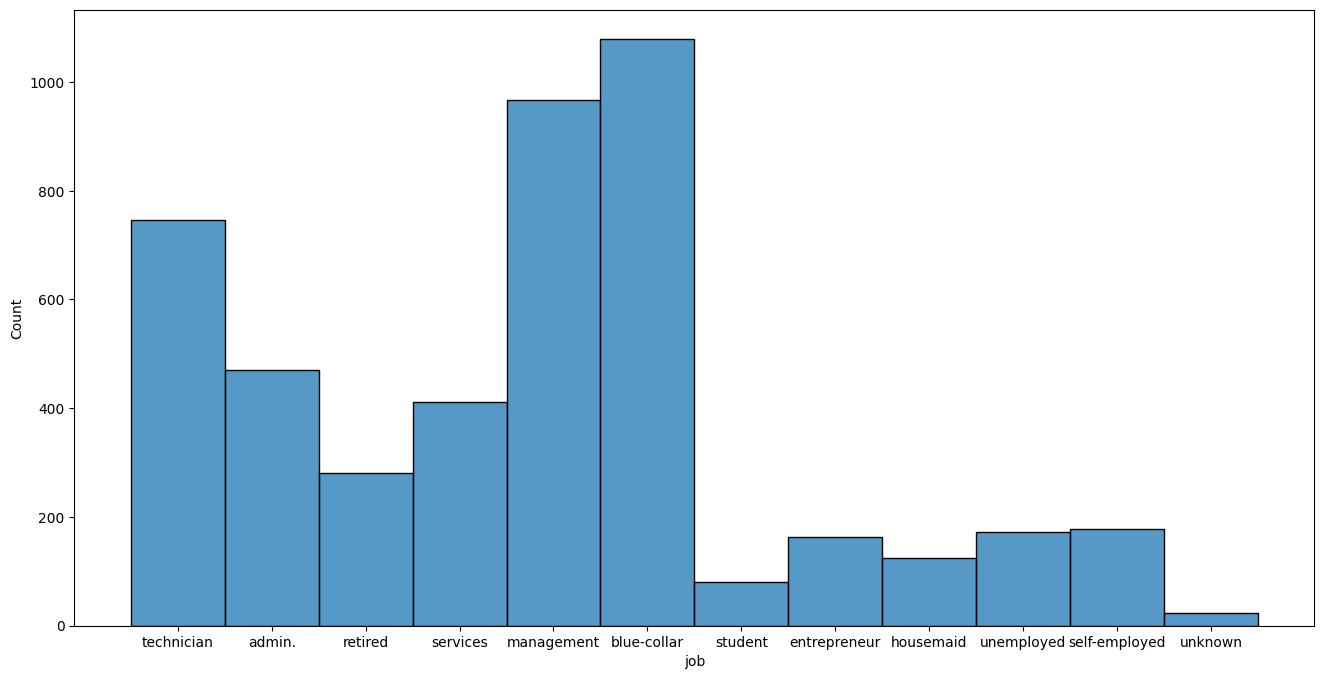

In [26]:
plt.figure(figsize=(16,8))
sns.histplot(duration_df['job'])
plt.show()

<Axes: xlabel='y'>

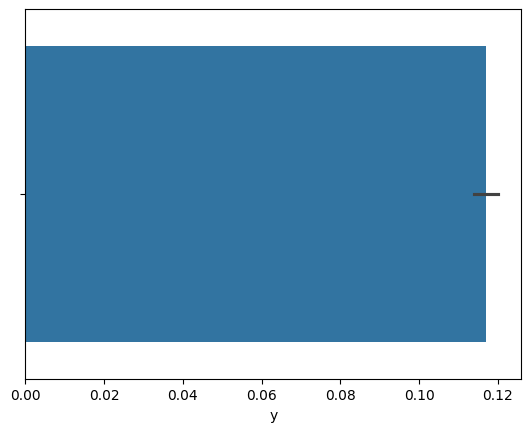

In [27]:
sns.barplot(x=df['y'])

<Axes: ylabel='age'>

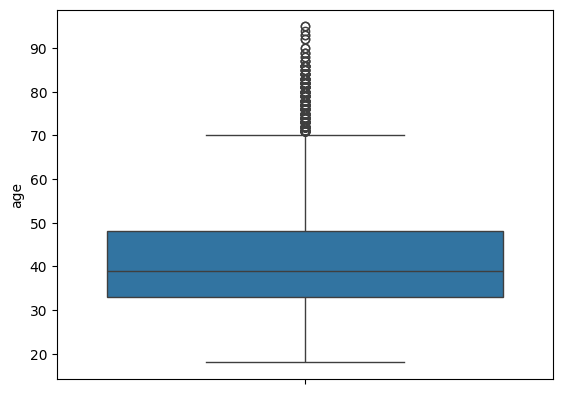

In [28]:
sns.boxplot(df['age'])

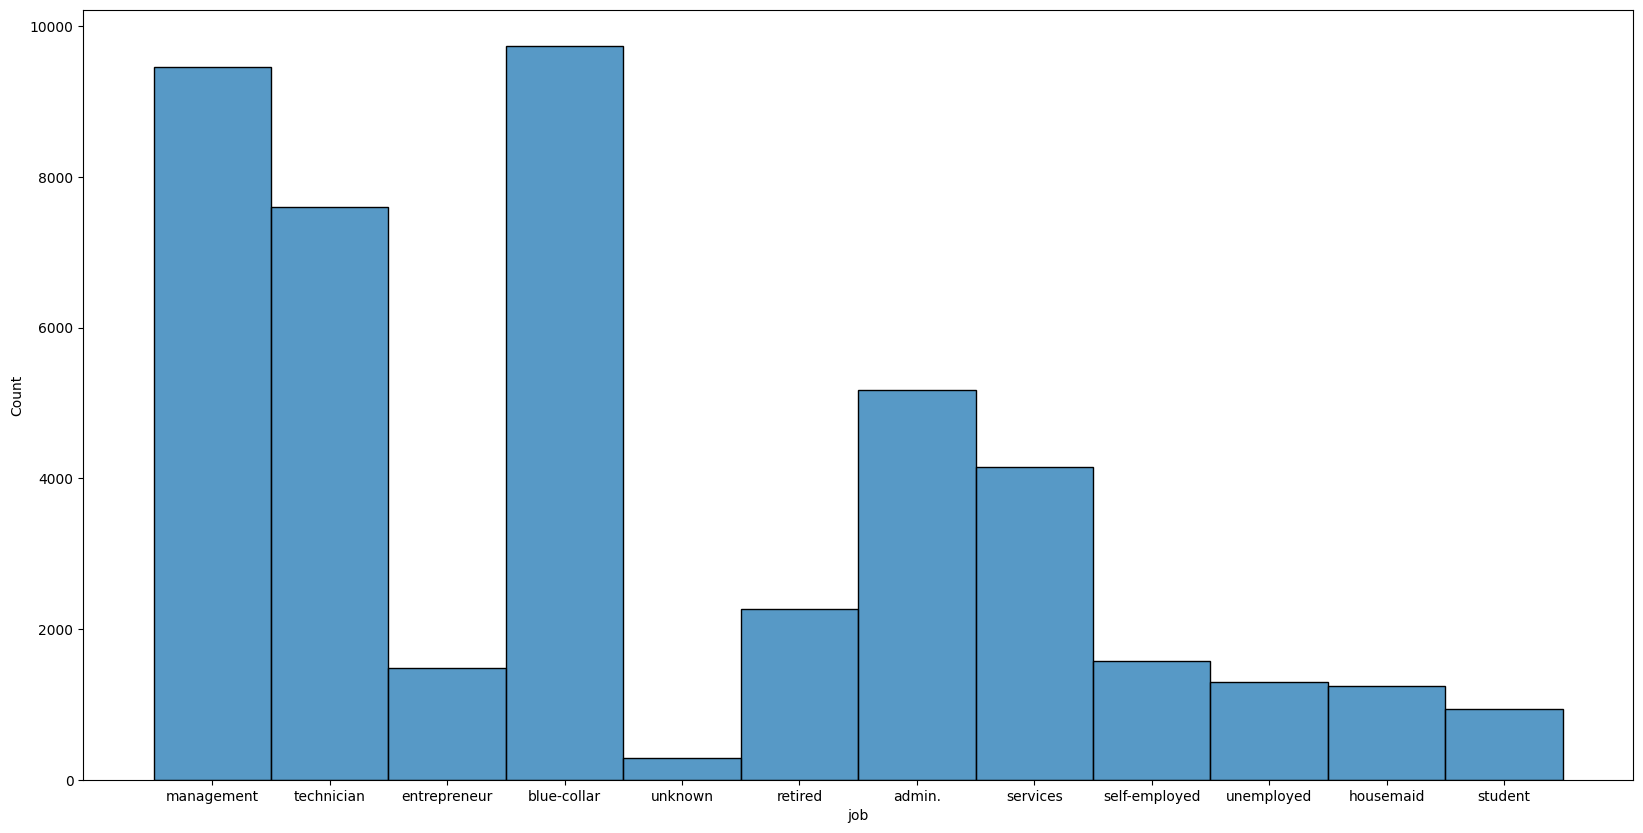

In [29]:
plt.figure(figsize=(20,10))
sns.histplot(x=df['job'])
plt.show()

<Axes: xlabel='marital', ylabel='Count'>

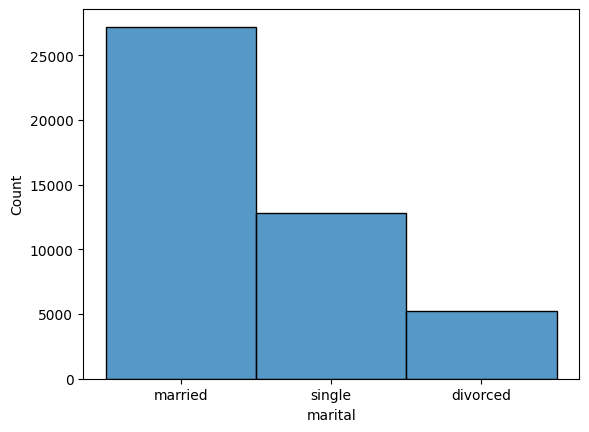

In [30]:
sns.histplot(x=df['marital'])

In [31]:
df['education'].value_counts().reset_index()

,education,count
0,secondary,23202
1,tertiary,13301
2,primary,6851
3,unknown,1857


<Axes: xlabel='balance', ylabel='Count'>

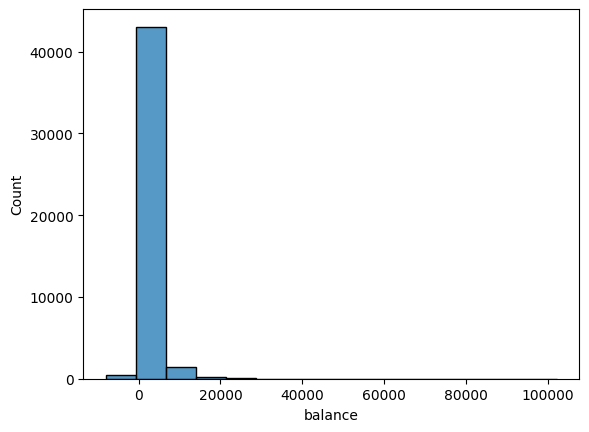

In [32]:
sns.histplot(x=df['balance'], bins=15)

In [33]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<Axes: xlabel='housing', ylabel='Count'>

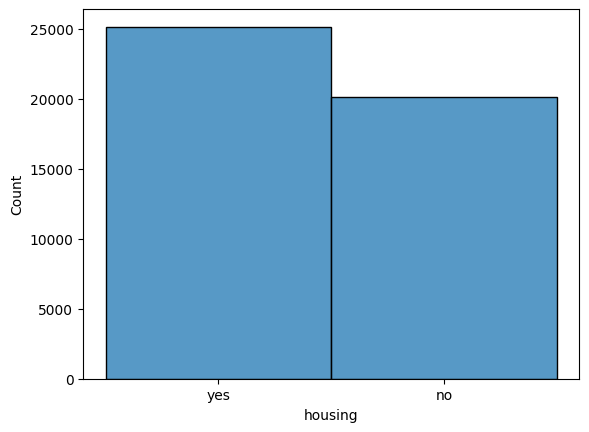

In [34]:
#Distribution for if they bought a mortgage or not
sns.histplot(df['housing'])

<Axes: xlabel='loan', ylabel='Count'>

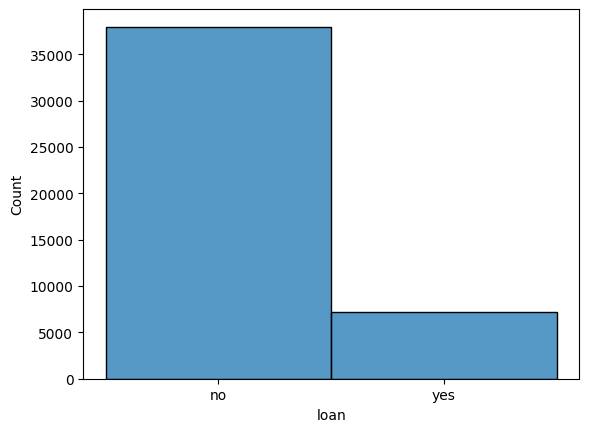

In [35]:
sns.histplot(df['loan'])

<Axes: xlabel='contact', ylabel='Count'>

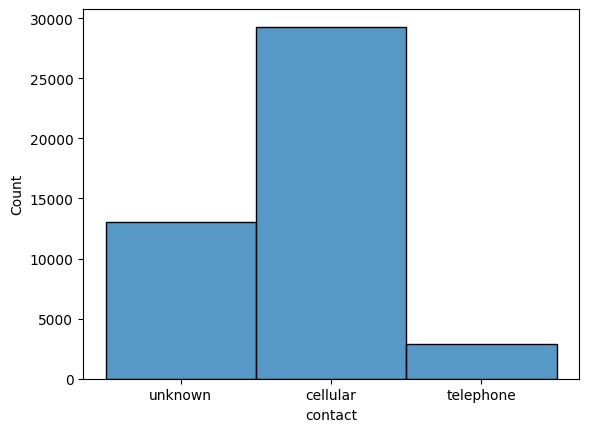

In [36]:
sns.histplot(df['contact'])

<Axes: xlabel='day', ylabel='Count'>

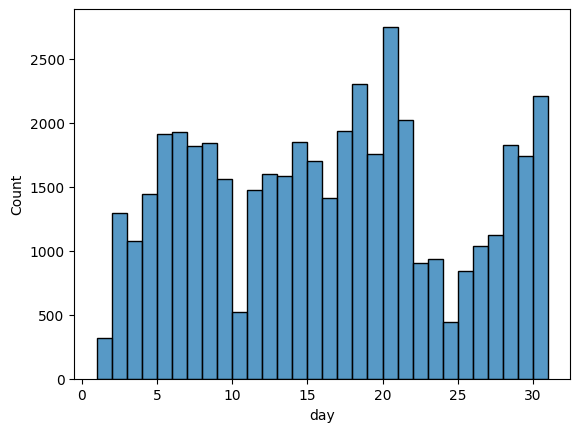

In [37]:
#majority of the distribution were contacted on the 21st of each month

sns.histplot(df['day'],bins=30)

<Axes: xlabel='month', ylabel='Count'>

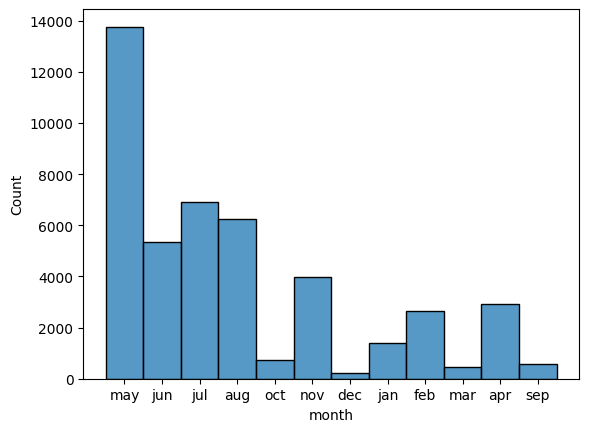

In [38]:
#Majority of the sample were contacted in May and began to fall off significantly throughout the distribution
sns.histplot(df['month'])

<Axes: xlabel='duration', ylabel='Count'>

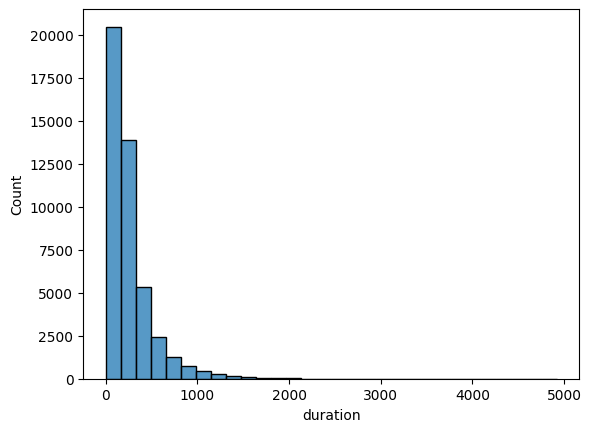

In [39]:
sns.histplot(df['duration'], bins=30)

In [40]:
df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [41]:
df['duration']

0         261
1         151
2          76
3          92
4         198
         ... 
45206     977
45207     456
45208    1127
45209     508
45210     361
Name: duration, Length: 45211, dtype: int64

In [42]:
df[df['duration'] == 4918]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cut
24148,59,technician,married,tertiary,no,6573,yes,no,telephone,10,nov,4918,1,-1,0,unknown,0,"(52.0, 95.0]"


<Axes: xlabel='campaign', ylabel='Count'>

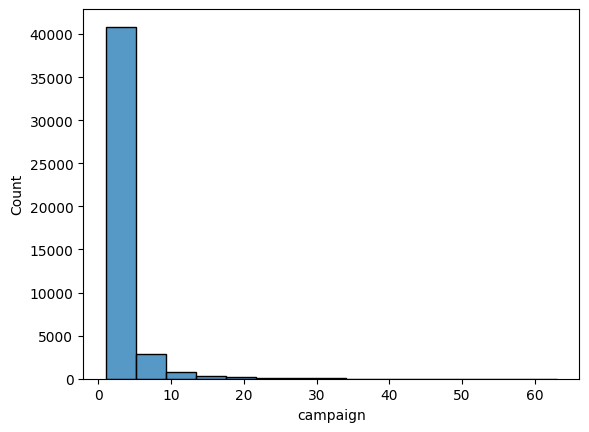

In [43]:
sns.histplot(x=df['campaign'], bins=15)

<Axes: xlabel='pdays', ylabel='Count'>

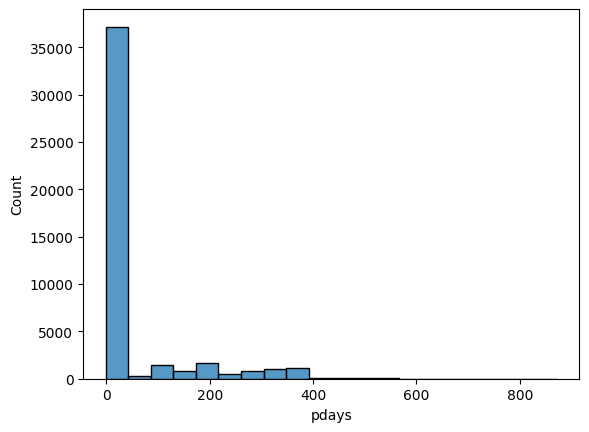

In [44]:
sns.histplot(df['pdays'], bins=20)

In [45]:
#Interesting variable for those who subscribed a term deposit - will look into this
df['pdays'].value_counts().reset_index()

,pdays,count
0,-1,36954
1,182,167
2,92,147
3,91,126
4,183,126
...,...,...
554,449,1
555,452,1
556,648,1
557,595,1


In [46]:
# Too many unknown observations, need to find an explanation how to interpret them. Success can be assumed to be those who
# subscribed a term deposit... "Other" category can be determined as a "maybe" for those responding from the campaign they were
# exposed to.
df['poutcome'].value_counts().reset_index()

,poutcome,count
0,unknown,36959
1,failure,4901
2,other,1840
3,success,1511


In [47]:
df['y'].value_counts().reset_index()

,y,count
0,0,39922
1,1,5289


In [48]:
#Isolate the outcome variable
sub_df = df[df['y'] == 1]
sub_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cut
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1,"(52.0, 95.0]"
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1,"(52.0, 95.0]"
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1,"(39.0, 45.0]"
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1,"(52.0, 95.0]"
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1,"(52.0, 95.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,1,"(52.0, 95.0]"
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,1,"(17.999, 31.0]"
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,"(45.0, 52.0]"
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,"(52.0, 95.0]"


In [49]:
notsubbed = df[df['y'] == 0]
notsubbed

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cut
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,"(52.0, 95.0]"
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,"(39.0, 45.0]"
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,"(31.0, 35.0]"
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,"(45.0, 52.0]"
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,"(31.0, 35.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,0,"(52.0, 95.0]"
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,0,"(35.0, 39.0]"
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,0,"(31.0, 35.0]"
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,"(52.0, 95.0]"


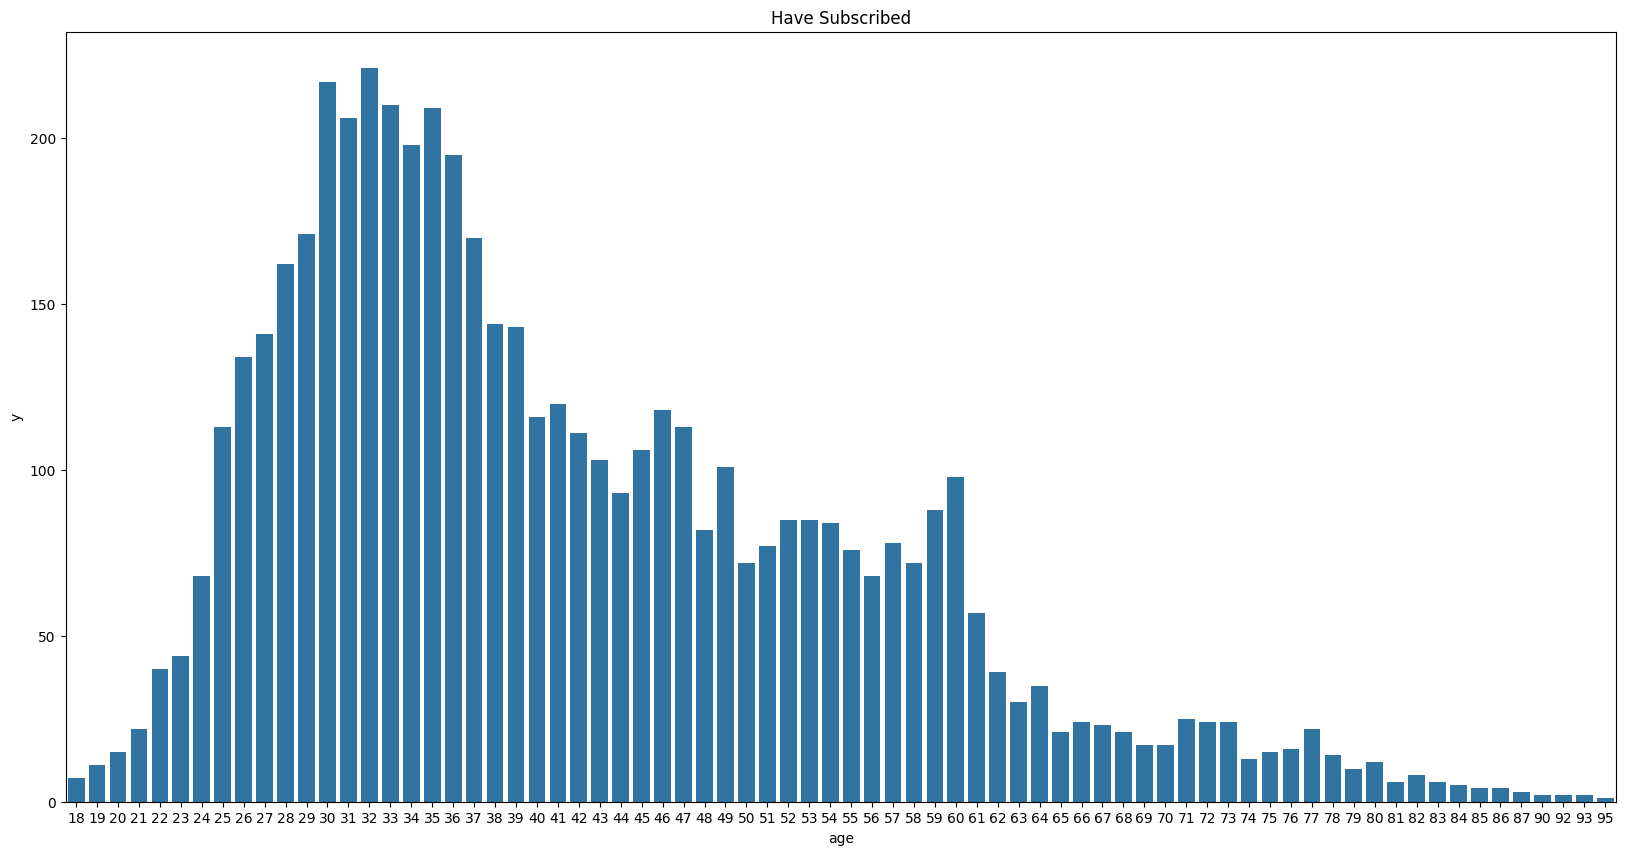

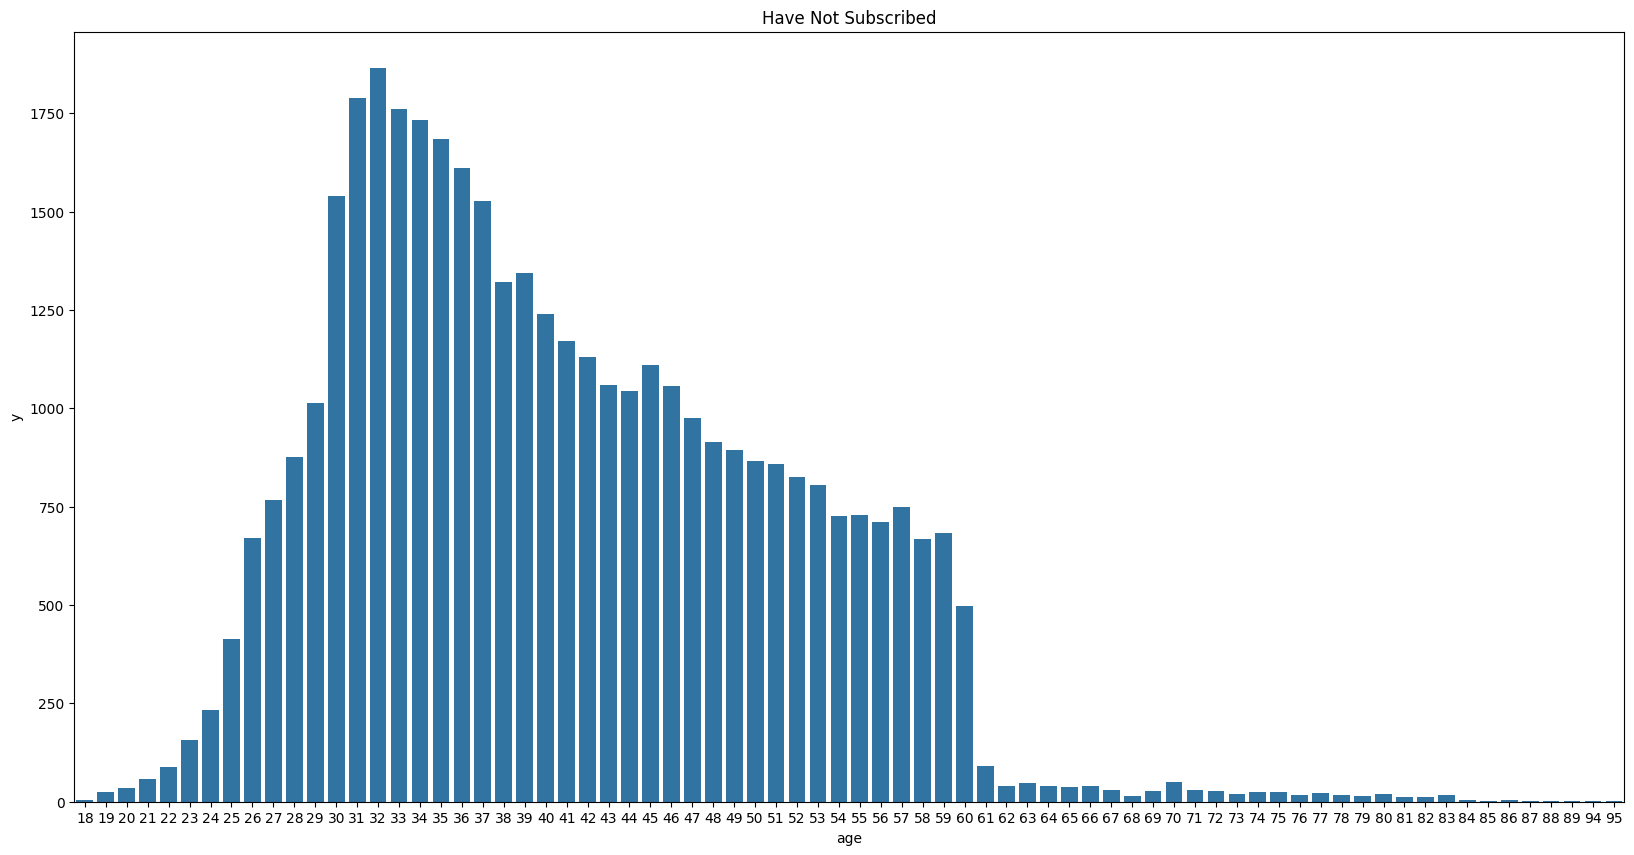

In [50]:
sub_age = sub_df.groupby('age')

# generate bar plot for how many customers have churned per age
# Note: Using count instead of sum would be incorrect, count will just return the number of people at that age
# Assuming has churned is represented as 1, then the sum of the churn column represents how many customers have churned at that age
plt.figure(figsize=(20,10))
sns.barplot(x=sub_age['y'].sum().index, y=sub_age['y'].sum())
plt.title("Have Subscribed")
plt.show()


# check for people who have not churned
notsubbed_Age = notsubbed.groupby('age')
# using count here since sum of all who have not churned would be 0
plt.figure(figsize=(20,10))
sns.barplot(x=notsubbed_Age['y'].count().index, y=notsubbed_Age['y'].count())
plt.title("Have Not Subscribed")
plt.show()

<Axes: xlabel='y', ylabel='pdays'>

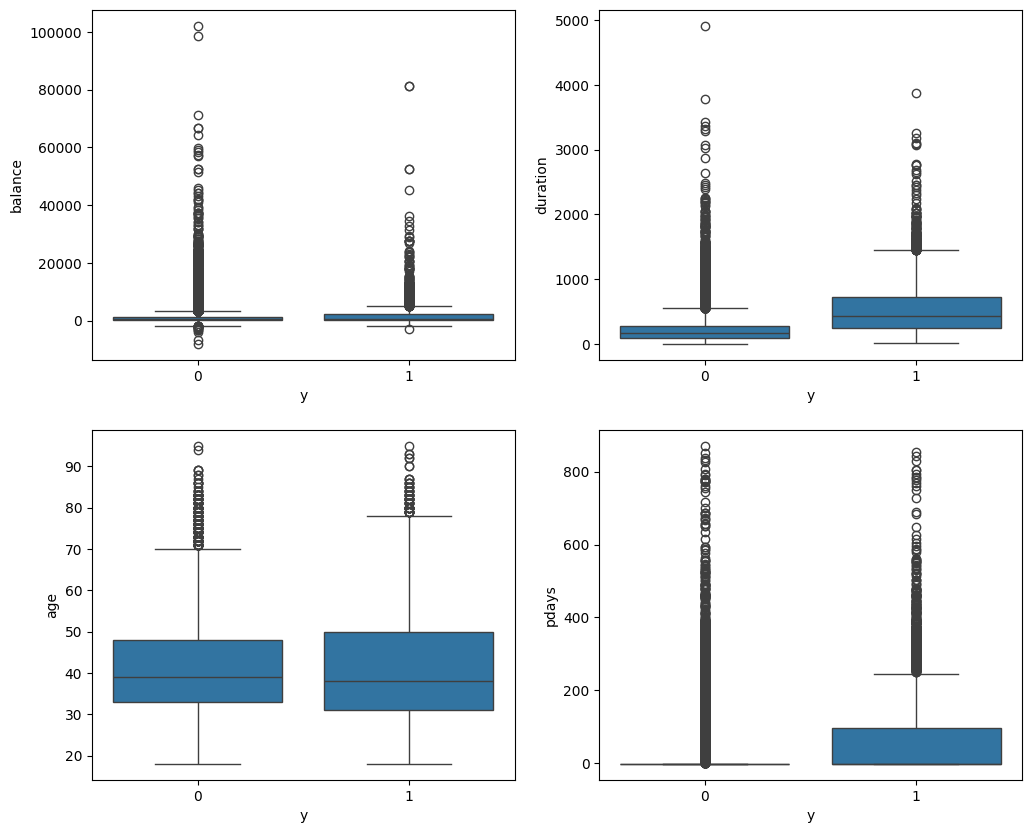

In [51]:
#More plots for the users that have subscribed - comparison using boxplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(12,10))
sns.boxplot(x='y', y='balance', data=df, ax=ax1)
sns.boxplot(x='y', y='duration', data=df, ax=ax2)
sns.boxplot(x='y', y='age', data=df, ax=ax3)
sns.boxplot(x='y', y='pdays', data=df, ax=ax4)

In [52]:
import statsmodels.api as sm

X = sm.add_constant(duration_df['duration'])  # Add intercept
y = duration_df['y']

# Fit logistic regression
model = sm.Logit(y, X)
result = model.fit()

# Print summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.672023
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 4696
Model:                          Logit   Df Residuals:                     4694
Method:                           MLE   Df Model:                            1
Date:                Mon, 23 Sep 2024   Pseudo R-squ.:                 0.02253
Time:                        21:26:00   Log-Likelihood:                -3155.8
converged:                       True   LL-Null:                       -3228.6
Covariance Type:            nonrobust   LLR p-value:                 1.681e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1463      0.087    -13.159      0.000      -1.317      -0.976
duration       0.0011   9.75e

In [53]:
df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

<Axes: xlabel='age', ylabel='balance'>

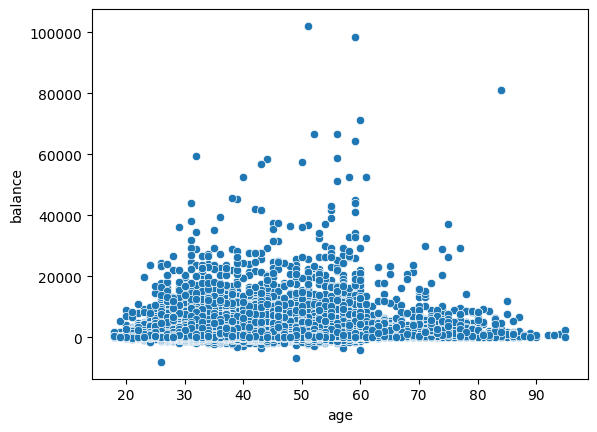

In [54]:
sns.scatterplot(x=df['age'], y=df['balance'])

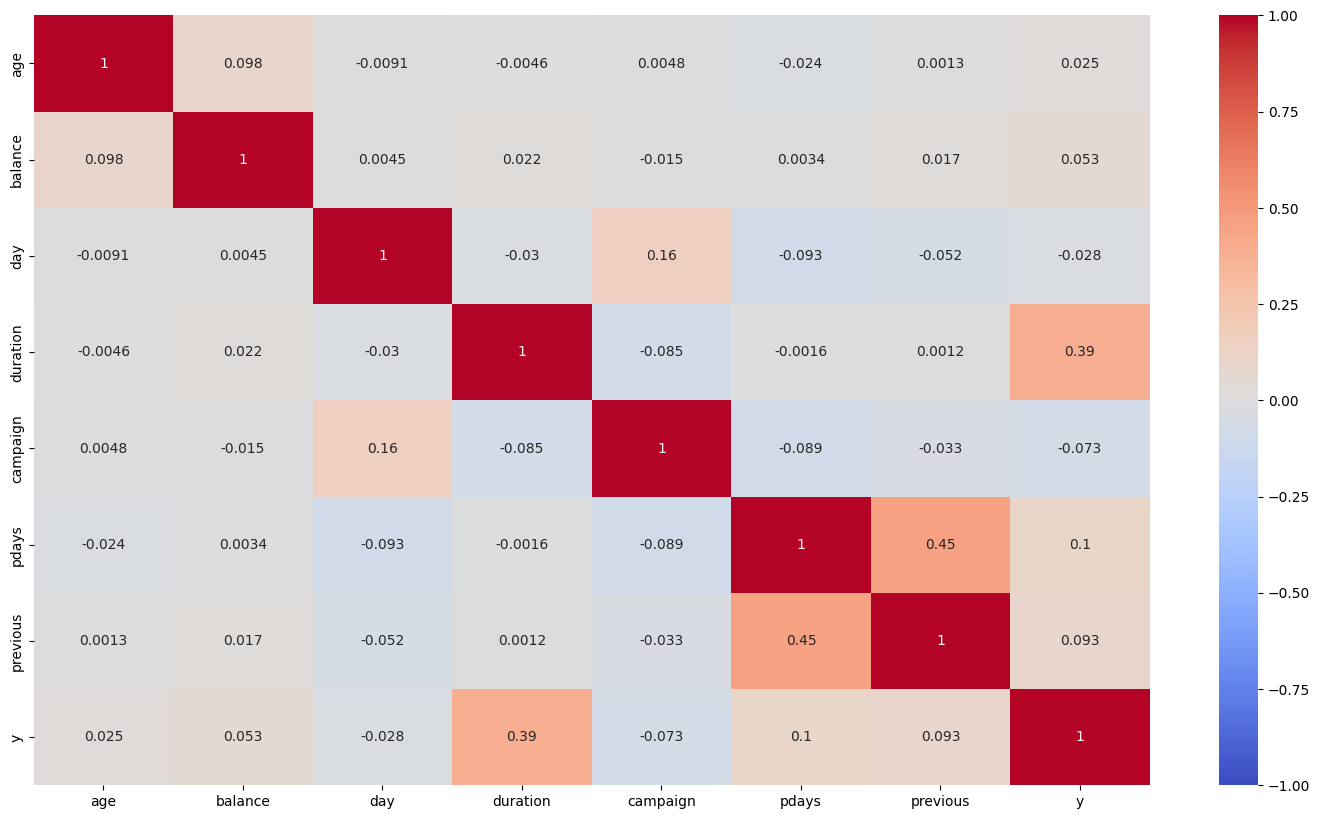

/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_78698/2454456081.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_corr.values, y=sub_corr.index, palette='viridis')


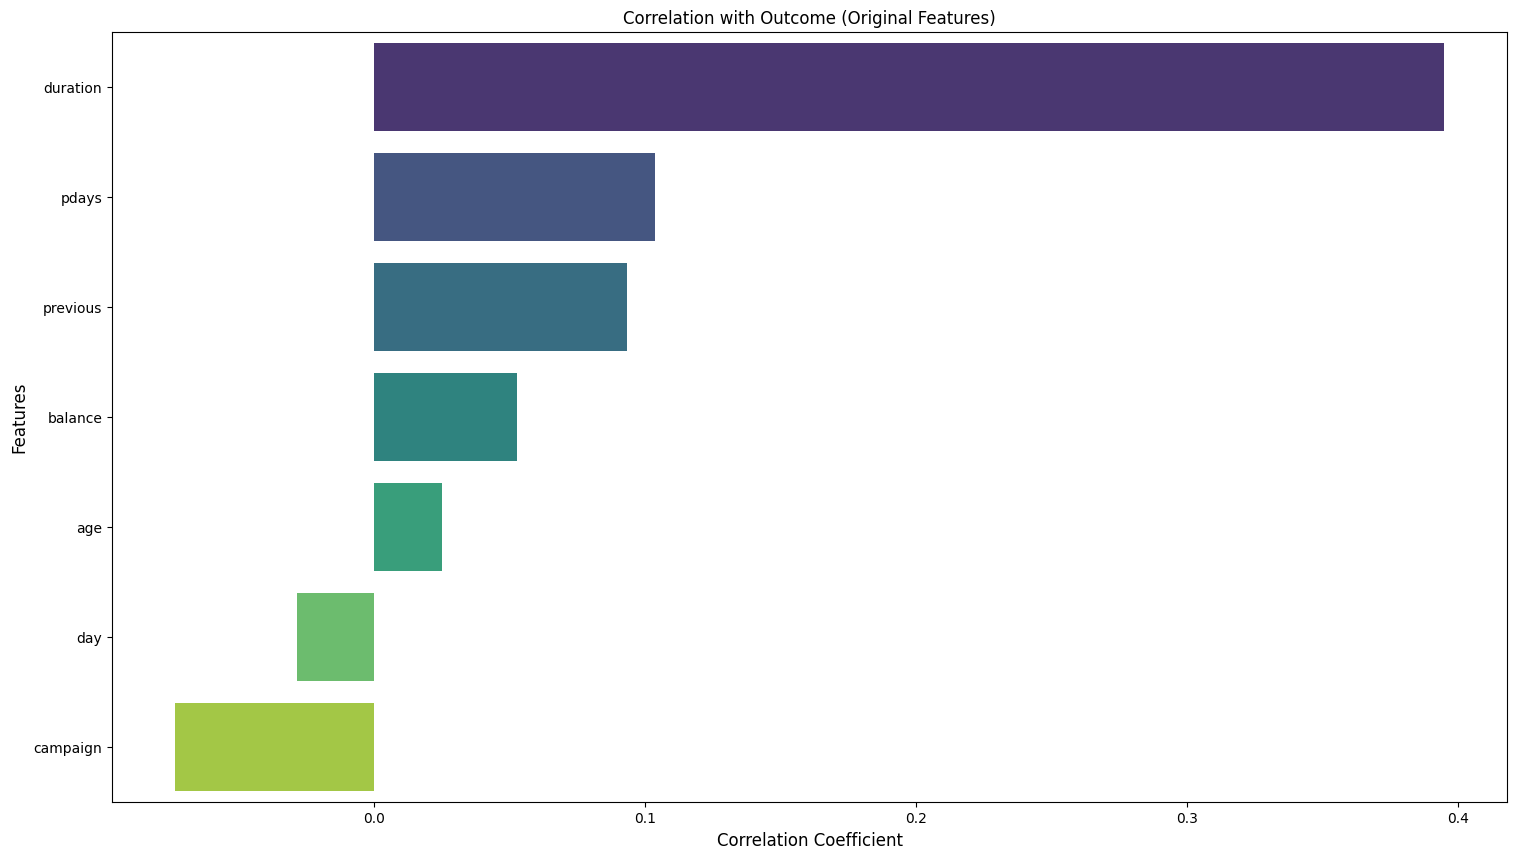

In [55]:
#Correlation and heatmap matrix

corr_matrix = df.corr(numeric_only=True)
sub_corr = corr_matrix['y'].drop('y').sort_values(ascending=False)

#Heatmap
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

#Correlation Matrix
plt.figure(figsize=(18,10))
sns.barplot(x=sub_corr.values, y=sub_corr.index, palette='viridis')
plt.title('Correlation with Outcome (Original Features)')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()



Duration seems to have the highest correlation with the outcome variable with pdays, previous
and balance having the next largest positive correlation.

Balance and pdays could be less of a factor once outliers have been dealt with.

Campaign has the largest negative correlation with the outcome variable

In [56]:
#Label encoder to categorize them in a numerical output instead of strings. This can allow for better interpretability with our future models

labelecoder = LabelEncoder()

enc_df = df.copy()

encoding_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']

for col in encoding_col:
    enc_df[col] = labelecoder.fit_transform(enc_df[col])

enc_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cut
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0,"(52.0, 95.0]"
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0,"(39.0, 45.0]"
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0,"(31.0, 35.0]"
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0,"(45.0, 52.0]"
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0,"(31.0, 35.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,nov,977,3,-1,0,3,1,"(45.0, 52.0]"
45207,71,5,0,0,0,1729,0,0,0,17,nov,456,2,-1,0,3,1,"(52.0, 95.0]"
45208,72,5,1,1,0,5715,0,0,0,17,nov,1127,5,184,3,2,1,"(52.0, 95.0]"
45209,57,1,1,1,0,668,0,0,1,17,nov,508,4,-1,0,3,0,"(52.0, 95.0]"


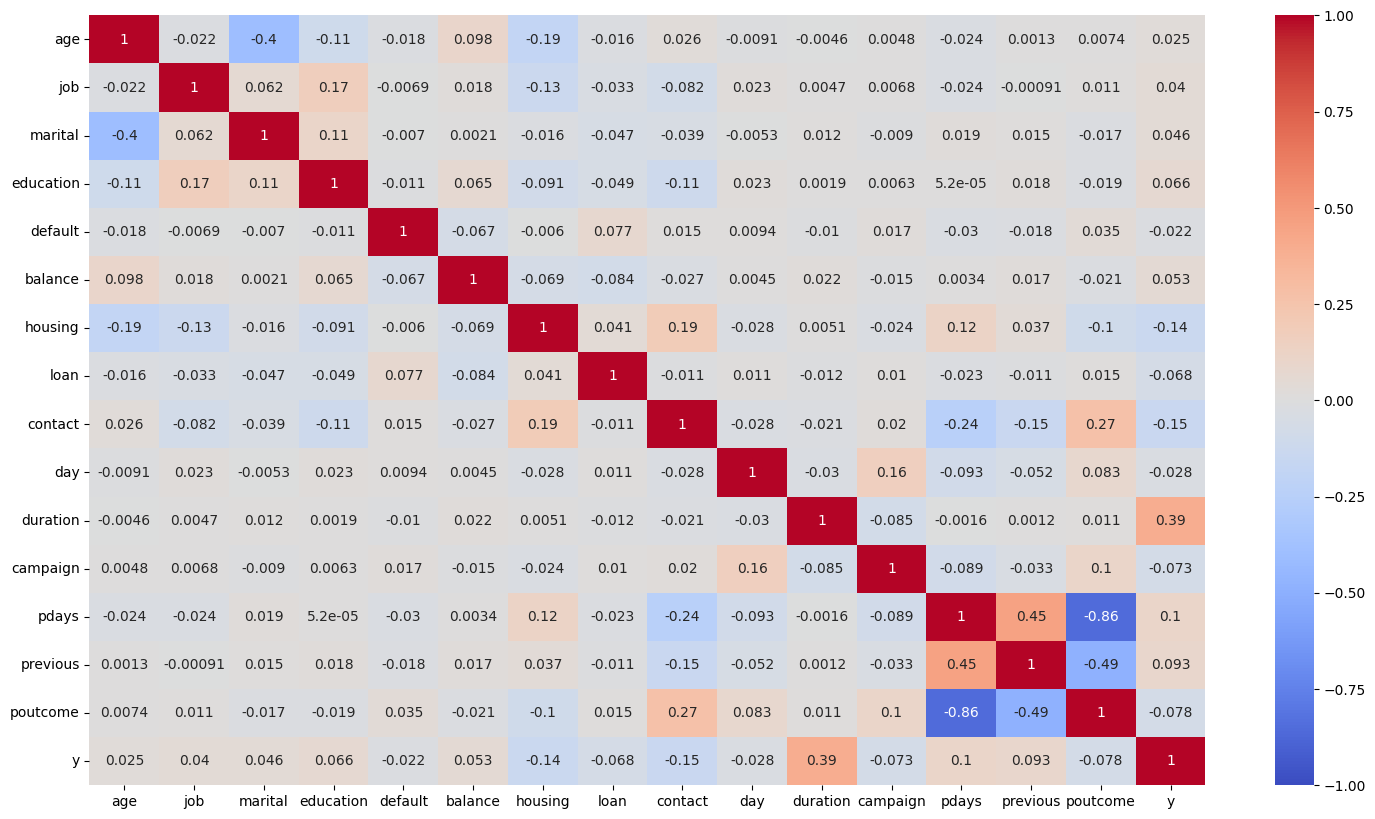

/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_78698/502674068.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sub_corr.values, y=sub_corr.index, palette='viridis')


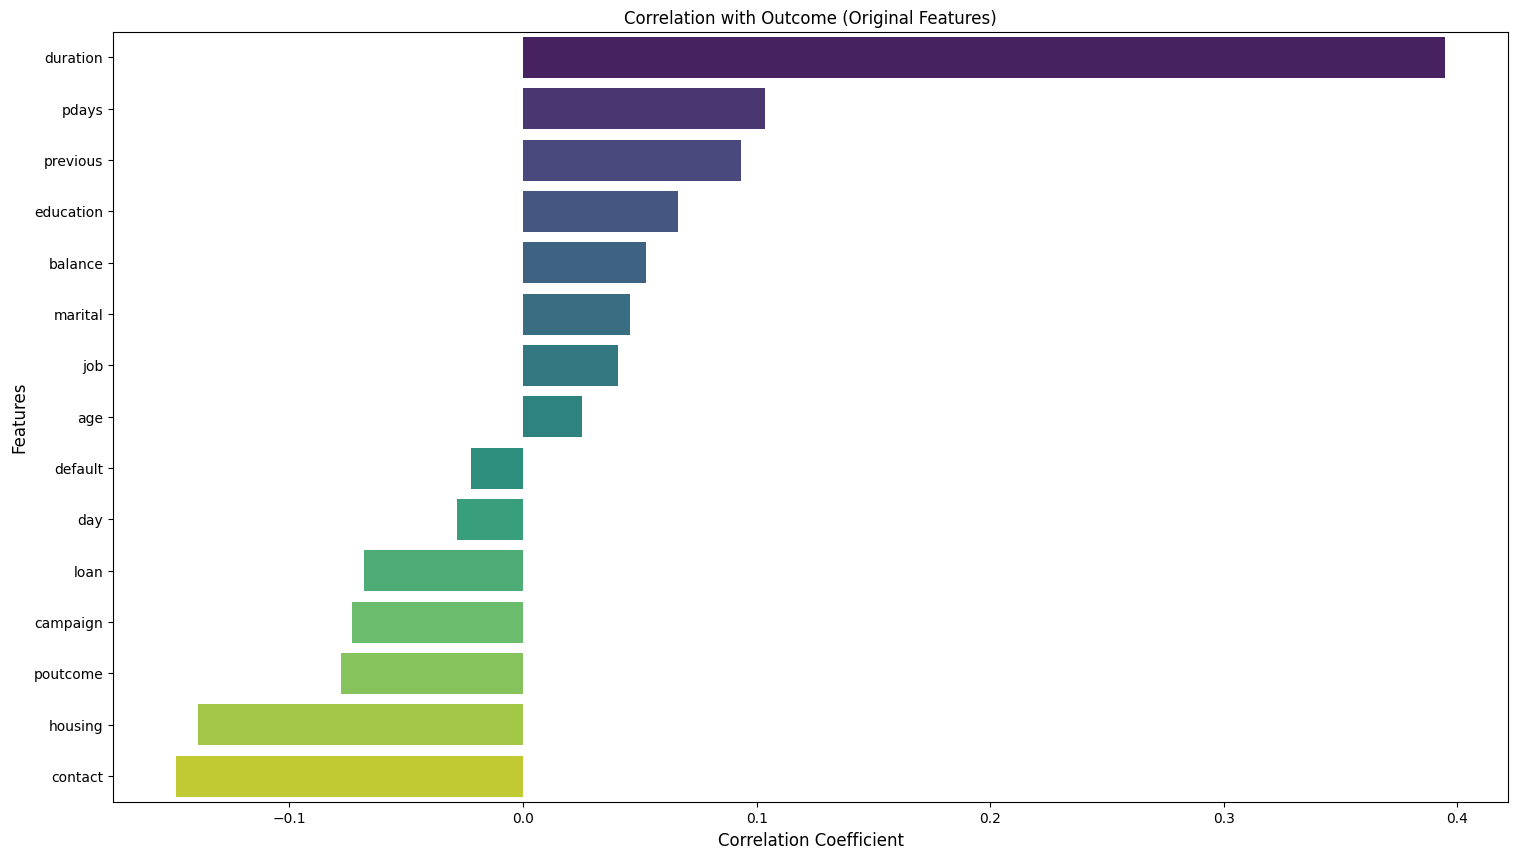

In [57]:
# Correlation matrix

corr_matrix = enc_df.corr(numeric_only=True)
sub_corr = corr_matrix['y'].drop('y').sort_values(ascending=False)

#Heatmap
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.show()

#Correlation Matrix
plt.figure(figsize=(18,10))
sns.barplot(x=sub_corr.values, y=sub_corr.index, palette='viridis')
plt.title('Correlation with Outcome (Original Features)')
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

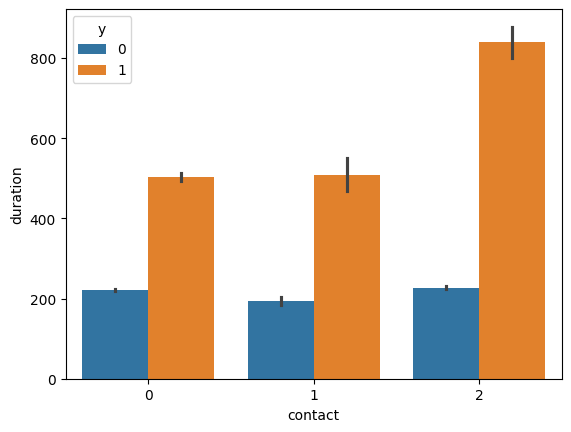

In [58]:
#Going to further explore the duration, contact, and housing variables

sns.barplot(x='contact', y='duration', hue='y', data=enc_df)
plt.show()

In [59]:
sns.pairplot(df[['duration', 'balance', 'age', 'y']], hue='y')
sns.jointplot(x='duration', y='balance', data=df, kind='scatter')

Error in callback <function flush_figures at 0x29011ae50> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

It seems theres a difference in comparison for those who purchase bank term deposits, they all have on average larger durations than those who did not subscribe to a term deposit

In [ ]:
enc_df['contact'].value_counts().reset_index()

,contact,count
0,0,29285
1,2,13020
2,1,2906


## Feature Engineering

Converting the Day and Month column to its own datetime feature, adding a year column into the dataframe
Convert the continuous variable of "Balance" into a categorical variable
Bin the duration column

In [60]:
enc_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cut
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0,"(52.0, 95.0]"
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0,"(39.0, 45.0]"
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0,"(31.0, 35.0]"
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0,"(45.0, 52.0]"
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0,"(31.0, 35.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,nov,977,3,-1,0,3,1,"(45.0, 52.0]"
45207,71,5,0,0,0,1729,0,0,0,17,nov,456,2,-1,0,3,1,"(52.0, 95.0]"
45208,72,5,1,1,0,5715,0,0,0,17,nov,1127,5,184,3,2,1,"(52.0, 95.0]"
45209,57,1,1,1,0,668,0,0,1,17,nov,508,4,-1,0,3,0,"(52.0, 95.0]"


In [ ]:
#Converting to Date/Time Function

year = 2008

years = []

# Loop through each row of the DataFrame -- Understand how this works
for index, row in df.iterrows():
    # If the month is 'dec', assign the current year and then increment for the next rows
    if row['month'] == 'dec' and index > 0 and df.iloc[index - 1]['month'] != 'dec':
        years.append(year)
        year += 1
    else:
        years.append(year)

enc_df['year'] = years

enc_df['date'] = pd.to_datetime(df['day'].astype(str) + '-' + df['month'] + '-' + df['year'].astype(str), format='%d-%b-%Y') 
enc_df


,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,age_cut,money_level,year,date
0,58,4,1,2,0,2143,1,0,2,5,...,261,1,-1,0,3,0,"(52.0, 95.0]",2,2008,2008-05-05
1,44,9,2,1,0,29,1,0,2,5,...,151,1,-1,0,3,0,"(39.0, 45.0]",0,2008,2008-05-05
2,33,2,1,1,0,2,1,1,2,5,...,76,1,-1,0,3,0,"(31.0, 35.0]",0,2008,2008-05-05
3,47,1,1,3,0,1506,1,0,2,5,...,92,1,-1,0,3,0,"(45.0, 52.0]",2,2008,2008-05-05
4,33,11,2,3,0,1,0,0,2,5,...,198,1,-1,0,3,0,"(31.0, 35.0]",0,2008,2008-05-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,...,977,3,-1,0,3,1,"(45.0, 52.0]",0,2010,2010-11-17
45207,71,5,0,0,0,1729,0,0,0,17,...,456,2,-1,0,3,1,"(52.0, 95.0]",2,2010,2010-11-17
45208,72,5,1,1,0,5715,0,0,0,17,...,1127,5,184,3,2,1,"(52.0, 95.0]",2,2010,2010-11-17
45209,57,1,1,1,0,668,0,0,1,17,...,508,4,-1,0,3,0,"(52.0, 95.0]",0,2010,2010-11-17


In [ ]:
# 2010 had the highest percentage of a user subscribing to a term deposit. Research into the success rate during the year 2010
df.groupby(['year'], as_index=False)['y'].mean()

,year,y
0,2008,0.050511
1,2009,0.166212
2,2010,0.514184


In [ ]:
# Filter the dataset for the year 2010
df_2008 = df[df['year'] == 2008]
df_2009 = df[df['year'] == 2009]
df_2010 = df[df['year'] == 2010]

# Group by 'poutcome' and calculate the success rate for 2010
success_rate_2008 = df_2008.groupby('poutcome').size() / len(df_2008)
success_rate_2009 = df_2009.groupby('poutcome').size() / len(df_2009)
success_rate_2010 = df_2010.groupby('poutcome').size() / len(df_2010)

print(success_rate_2008)
print(success_rate_2009)
print(success_rate_2010)


poutcome
failure    0.025075
other      0.006602
success    0.001515
unknown    0.966807
dtype: float64
poutcome
failure    0.240425
other      0.088728
success    0.045318
unknown    0.625528
dtype: float64
poutcome
failure    0.240426
other      0.125887
success    0.285106
unknown    0.348582
dtype: float64


In [ ]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [ ]:
#Converting balance to categorical (High, Medium, Low) - ** More optimization, remove the outliers and find out the more accurate quantiles

def money_class(x):
    if x >= 1500:
        return 'High'
    elif x < 1499 & x >= 750:
        return 'Medium'
    else:
        return 'Low'


df['m_class'] = df['balance'].apply(money_class)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,age_cut,year,date,m_class
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,0,"(52.0, 95.0]",2008,2008-05-05,High
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,0,"(39.0, 45.0]",2008,2008-05-05,Low
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,0,"(31.0, 35.0]",2008,2008-05-05,Low
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,0,"(45.0, 52.0]",2008,2008-05-05,High
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,0,"(31.0, 35.0]",2008,2008-05-05,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,...,977,3,-1,0,unknown,1,"(45.0, 52.0]",2010,2010-11-17,Low
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,...,456,2,-1,0,unknown,1,"(52.0, 95.0]",2010,2010-11-17,High
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,...,1127,5,184,3,success,1,"(52.0, 95.0]",2010,2010-11-17,High
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,...,508,4,-1,0,unknown,0,"(52.0, 95.0]",2010,2010-11-17,Low


In [ ]:
#Extra summary
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,m_class
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,3
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,Low
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,30669


In [ ]:
def money_class_num(x):
    if x >= 1500:
        return '2'
    elif x < 1499 & x >= 750:
        return '1'
    else:
        return '0'

enc_df['money_level'] = df['balance'].apply(money_class_num)

In [ ]:
enc_df['money_level'] = enc_df['money_level'].astype(int)
enc_df['money_level'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 45211 entries, 0 to 45210
Series name: money_level
Non-Null Count  Dtype
--------------  -----
45211 non-null  int64
dtypes: int64(1)
memory usage: 353.3 KB


In [ ]:
enc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   age          45211 non-null  int64         
 1   job          45211 non-null  int64         
 2   marital      45211 non-null  int64         
 3   education    45211 non-null  int64         
 4   default      45211 non-null  int64         
 5   balance      45211 non-null  int64         
 6   housing      45211 non-null  int64         
 7   loan         45211 non-null  int64         
 8   contact      45211 non-null  int64         
 9   day          45211 non-null  int64         
 10  month        45211 non-null  object        
 11  duration     45211 non-null  int64         
 12  campaign     45211 non-null  int64         
 13  pdays        45211 non-null  int64         
 14  previous     45211 non-null  int64         
 15  poutcome     45211 non-null  int64         
 16  y   

In [ ]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

## Model Building

In [ ]:
#Going to try to use regular df

categorical = ['housing', 'contact']
numerical = ['duration', 'pdays', 'previous', 'year']
#ordinal = ['money_level']

target = ['y']

X_train, X_test, y_train, y_test = train_test_split(enc_df[categorical + numerical], enc_df[target], test_size=0.3, random_state=42)

In [ ]:
#Preprocessing pipeline

catTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])

preprocessor = ColumnTransformer(transformers = [('cat', catTransformer, categorical), ('num', numTransformer, numerical)])


In [ ]:
#Logistic regression Model - Basic

logreg = Pipeline(steps=[('preprocessor', preprocessor), ('logistic', LogisticRegression())])

logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.8998083161309348
Precision:  0.6530089628681178
Recall:  0.3191489361702128
F1:  0.4287515762925599


Results are quite low given the varibles fed into the model. Precision is lackluster leading to only a 60% amount of True positives the model is predicting. Recall is very low (31%) which signifies the model is predicting a high amount of false negatives. For the business this would be costly due to the model not being able to identify target users who would subscribe to the term deposit and therefore it would have a direct impact on revenue. In order for this model to be efficient, Recall should be prioritized and increased to minimize the volume of false negatives to capture as many subscribers at possible, even if its at a cost of allowing some false positives.

In [ ]:
# Parameter tuning and grid search for Logistic Regression

param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],
    'logistic__penalty': ['l1', 'l2', 'elasticnet'],
    'logistic__solver': ['saga']  # saga solver supports l1, l2, and elasticnet
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(logreg, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for Logistic Regression:", grid_search.best_params_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning

Best hyperparameters for Logistic Regression: {'logistic__C': 10, 'logistic__penalty': 'l1', 'logistic__solver': 'saga'}


In [ ]:
#Final pipeline for Logistic 

logreg = Pipeline(steps= [('preprocessor', preprocessor), ('logistic', LogisticRegression(C=100, penalty='l1', solver='saga'))])

logreg.fit(X_train, y_train)

pred = logreg.predict(X_test)

# performance metrics (binary)
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred)
print("Precision:", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall Score:", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1 Score:", f1)


# cross validation
crossVal = cross_val_score(logreg, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

report_logreg_grid = classification_report(y_test, pred)
print(report_logreg_grid)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.8998083161309348
Precision: 0.638150289017341
Recall Score: 0.3454317897371715
F1 Score: 0.4482338611449452


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/s

Cross Validation F1 Scores: [0.42446043 0.40143369 0.42307692 0.40837696 0.42424242 0.38857143
 0.4368231  0.43928571 0.47140381 0.47602131]
Mean cross validation F1 Score: 0.4293695808843533
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.64      0.35      0.45      1598

    accuracy                           0.90     13564
   macro avg       0.78      0.66      0.70     13564
weighted avg       0.88      0.90      0.89     13564



/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#KNN model - Basic

knn = Pipeline(steps=[('preprocessor', preprocessor), ('knn', KNeighborsClassifier())])

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.8920672368033029
Precision:  0.553343949044586
Recall:  0.434918648310388
F1:  0.48703573931324456


In [ ]:
#Parameter tuning and Grid Search for KNN

param_grid = {
    'knn__n_neighbors': [5, 7, 9, 15, 35, 45, 55],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(knn, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWa

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['housing',
                                                                          'contact']),
                                                                        ('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['duration',
                                                                          'pdays',
                                                                          'previous',
                                                                          'year'])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
                         'knn__n_neighbors': [5, 7, 9, 15, 35, 45, 55],
                         'knn__weights': ['uniform', 'distance']},
             scoring='f1', verbose=1)

In [ ]:
# Output the best hyperparameter combination
print("Best hyperparameters for KNN:", grid_search.best_params_)

Best hyperparameters for KNN: {'knn__metric': 'manhattan', 'knn__n_neighbors': 15, 'knn__weights': 'uniform'}


In [ ]:
#Final Pipeline for KNN

knn = Pipeline(steps= (['preprocessor', preprocessor], ('knn', KNeighborsClassifier(metric='euclidean', n_neighbors=5, weights='distance'))))

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

# cross validation
crossVal = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

report_knn_grid = classification_report(y_test, pred)
print(report_knn_grid)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.8896343261574756
Precision:  0.5386973180076629
Recall:  0.4399249061326658
F1:  0.48432655873234587


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWa

Cross Validation F1 Scores: [0.44929797 0.45259939 0.44807122 0.45074627 0.49632893 0.4760479
 0.44690967 0.48361934 0.48955224 0.49621785]
Mean cross validation F1 Score: 0.4689390780325094
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11966
           1       0.54      0.44      0.48      1598

    accuracy                           0.89     13564
   macro avg       0.73      0.69      0.71     13564
weighted avg       0.88      0.89      0.88     13564



/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#Random Forest - Basic

rf = Pipeline(steps=[('preprocessor', preprocessor), ('rf', RandomForestClassifier())])

rf.fit(X_train, y_train)
pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy:  0.891108817457977
Precision:  0.5447816432272391
Recall:  0.46057571964956195
F1:  0.49915225500169547


In [ ]:
#Random Forest Final Pipeline

# Define hyperparameter grid
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV to find the best hyperparameter combination
grid_search = GridSearchCV(rf, param_grid, cv=5, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

# Output the best hyperparameter combination
print("Best hyperparameters for Random Forest:", grid_search.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A co

Best hyperparameters for Random Forest: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 100}


In [ ]:
# Final Random Forest Pipeline

rf = Pipeline(steps = (['preprocessor', preprocessor], ('rf', RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100))))

rf.fit(X_train, y_train)
pred = rf.predict(X_test)

# cross validation
crossVal = cross_val_score(knn, X_train, y_train, cv=10, scoring='f1')

# print scores
print("Cross Validation F1 Scores:", crossVal)
print("Mean cross validation F1 Score:", np.mean(crossVal))

report_rf_grid = classification_report(y_test, pred)
print(report_rf_grid)


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversio

Cross Validation F1 Scores: [0.44929797 0.45259939 0.44807122 0.45074627 0.49632893 0.4760479
 0.44690967 0.48361934 0.48955224 0.49621785]
Mean cross validation F1 Score: 0.4689390780325094
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11966
           1       0.65      0.44      0.52      1598

    accuracy                           0.91     13564
   macro avg       0.79      0.70      0.73     13564
weighted avg       0.89      0.91      0.90     13564



/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Random Forest Grid search and parameter tuning did not have much of an effect on our model. Key notes include the model being computationally intensive creating all the different trees taking a long time with not the best positive results. 

In [ ]:
#AdaBoost - Basic

ada = Pipeline(steps=[('preprocessor', preprocessor), ('ada', AdaBoostClassifier())])

ada.fit(X_train, y_train)
pred = ada.predict(X_test)

accuracy = accuracy_score(y_test, pred)
print("Accuracy: ", accuracy)
precision = precision_score(y_test, pred, average='binary')
print("Precision: ", precision)
recall = recall_score(y_test, pred, average='binary')
print("Recall: ", recall)
f1 = f1_score(y_test, pred, average='binary')
print("F1: ", f1)

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy:  0.8918460631082277
Precision:  0.5696068012752391
Recall:  0.3354192740926158
F1:  0.42221346987002756


In [ ]:
#Grid search for Adaboost model

param_grid = {
    'ada__n_estimators': [50, 100, 200],  # Number of estimators (weak learners)
    'ada__learning_rate': [0.01, 0.1, 1, 1.5],  # Learning rate controls the contribution of each weak learner
    'ada__algorithm': ['SAMME', 'SAMME.R']  # Different boosting algorithms
}

ada = Pipeline(steps=[('preprocessor', preprocessor), ('ada', AdaBoostClassifier())])

grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best parameters and the corresponding best score
print("Best Parameters: ", grid_search.best_params_)
print("Best F1 Score: ", grid_search.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning

Best Parameters:  {'ada__algorithm': 'SAMME.R', 'ada__learning_rate': 1.5, 'ada__n_estimators': 100}
Best F1 Score:  0.43781537760252043


In [ ]:
#Final pipeline for Ada boost with best params

ada = Pipeline(steps = (['preprocessor', preprocessor], ('ada', AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1.5, n_estimators=100))))

ada.fit(X_train, y_train)
pred = ada.predict(X_test)

crossVal = cross_val_score(ada, X_train, y_train, cv = 10, scoring = 'f1')

print('Cross Validation F1 Scores: ', crossVal)
print('Mean Cross Validation F1 Scores', np.mean(crossVal))

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algor

Cross Validation F1 Scores:  [0.40202703 0.40695652 0.4534687  0.43551089 0.47635135 0.43233743
 0.41052632 0.43523316 0.44630872 0.43432574]
Mean Cross Validation F1 Scores 0.4333045864659807


In [ ]:
report_ada_grid = classification_report(y_test, pred)
print(report_ada_grid)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11966
           1       0.60      0.34      0.43      1598

    accuracy                           0.90     13564
   macro avg       0.76      0.65      0.69     13564
weighted avg       0.88      0.90      0.88     13564



Ada boost after parameter tuning had the second best score in comparison to the Random Forest Classifier. Precision increased by 1 and recall had the same value. Having similar performance to the Random Forest model, the overall feedback would be the AdaBoost was much more efficient in training the models and making predictions at a fraction of the time in comparison as well. 

AdaBoost took 30 seconds for grid search vs Random Forest where it took almost 10 minutes to process.


In [ ]:
#Going to try the models now with the new dataframe with individuals where the duration of the call is 537 or over seconds

#Feature engineering for the duration df

#Money class
def money_class_num(x):
    if x >= 1500:
        return '2'
    elif x < 1499 & x >= 750:
        return '1'
    else:
        return '0'

duration_df['money_level'] = duration_df['balance'].apply(money_class_num)
duration_df


/var/folders/0q/z048sjx17mz9yrftyzsvw98r0000gp/T/ipykernel_70365/4179355724.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration_df['money_level'] = duration_df['balance'].apply(money_class_num)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_cut,money_level
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,0,"(52.0, 95.0]",1
38,36,admin.,divorced,secondary,no,506,yes,no,unknown,5,may,577,1,-1,0,unknown,0,"(35.0, 39.0]",0
43,54,retired,married,secondary,no,529,yes,no,unknown,5,may,1492,1,-1,0,unknown,0,"(52.0, 95.0]",0
44,58,retired,married,unknown,no,96,yes,no,unknown,5,may,616,1,-1,0,unknown,0,"(52.0, 95.0]",0
53,42,admin.,single,secondary,no,-76,yes,no,unknown,5,may,787,1,-1,0,unknown,0,"(39.0, 45.0]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45158,34,student,single,unknown,no,2321,no,no,cellular,9,nov,600,2,99,5,failure,0,"(31.0, 35.0]",2
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,0,"(31.0, 35.0]",0
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,1,"(35.0, 39.0]",0
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,"(45.0, 52.0]",0


In [ ]:
#Trying again for random forest - adding best params with pca and smote

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(enc_df[categorical + numerical], enc_df[target], test_size=0.3, random_state=42)


# Apply SMOTE on training data only
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# PCA for dimensionality reduction
pca = PCA(n_components=5)  # Reduce to 5 components

# Define the random forest classifier
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100)

# Build the final pipeline (Preprocessing -> PCA -> Classifier)
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('pca', pca),                    # Apply PCA
    ('rf', rf)                       # Use RandomForestClassifier
])

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the pipeline with cross-validation
cv_scores = cross_val_score(pipeline, X_train_resampled, y_train_resampled, cv=cv, scoring='f1')

# Print cross-validation scores
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean CV F1 Score: {cv_scores.mean()}")

# Fit the pipeline on the resampled training data
pipeline.fit(X_train_resampled, y_train_resampled)

# Test the model on the original test set
y_pred = pipeline.predict(X_test)

# Calculate metrics on test data
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Test F1 Score: {f1}")


# Fit the pipeline on the resampled training data
pipeline.fit(X_train_resampled, y_train_resampled)

# Get predictions and scores for the training set
y_train_pred = pipeline.predict(X_train_resampled)
train_f1_score = f1_score(y_train_resampled, y_train_pred)
print(f"Training F1 Score: {train_f1_score:.4f}")

# Generate the classification report for the training set
train_report = classification_report(y_train_resampled, y_train_pred)
print("\nClassification Report (Training Set):")
print(train_report)

# Predict on the test set (without applying SMOTE to the test data)
y_test_pred = pipeline.predict(X_test)

# Generate the classification report on the test set
test_report = classification_report(y_test, y_test_pred)
print("\nClassification Report (Test Set):")
print(test_report)

# Calculate and print the F1 score on the test set
test_f1_score = f1_score(y_test, y_test_pred)
print(f"Test F1 Score: {test_f1_score:.4f}")

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A co

Cross-Validation F1 Scores: [0.81867757 0.80628803 0.81924051 0.81135562 0.7980262 ]
Mean CV F1 Score: 0.8107175869846796


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test Accuracy: 0.8619138897080507
Test F1 Score: 0.5602254050246537


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Training F1 Score: 0.8329

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.94      0.88      0.91     27956
           1       0.79      0.88      0.83     13978

    accuracy                           0.88     41934
   macro avg       0.86      0.88      0.87     41934
weighted avg       0.89      0.88      0.88     41934


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.88      0.92     11966
           1       0.45      0.76      0.57      1598

    accuracy                           0.86     13564
   macro avg       0.71      0.82      0.74     13564
weighted avg       0.90      0.86      0.88     13564

Test F1 Score: 0.5664


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(enc_df[categorical + numerical], enc_df[target], test_size=0.3, random_state=42)

# Apply SMOTE to achieve a total of 40,000 samples
required_ratio = 40000 / X_train.shape[0]
smote = SMOTE(sampling_strategy=required_ratio, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# PCA for dimensionality reduction
pca = PCA(n_components=5)

# Define the random forest classifier
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100)

# Build the final pipeline (Preprocessing -> PCA -> Classifier)
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('pca', pca),                    # Apply PCA
    ('rf', rf)                       # Use RandomForestClassifier
])

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the pipeline with cross-validation
cv_scores = cross_val_score(pipeline, X_train_resampled, y_train_resampled, cv=cv, scoring='f1')

# Print cross-validation scores
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean CV F1 Score: {cv_scores.mean()}")

# Fit the pipeline on the resampled training data
pipeline.fit(X_train_resampled, y_train_resampled)

# Test the model on the original test set
y_pred = pipeline.predict(X_test)

# Calculate metrics on test data
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Test F1 Score: {f1}")

# Get predictions and scores for the training set
y_train_pred = pipeline.predict(X_train_resampled)
train_f1_score = f1_score(y_train_resampled, y_train_pred)
print(f"Training F1 Score: {train_f1_score:.4f}")

# Generate the classification report for the training set
train_report = classification_report(y_train_resampled, y_train_pred)
print("\nClassification Report (Training Set):")
print(train_report)

# Predict on the test set (without applying SMOTE to the test data)
y_test_pred = pipeline.predict(X_test)

# Generate the classification report on the test set
test_report = classification_report(y_test, y_test_pred)
print("\nClassification Report (Test Set):")
print(test_report)

# Calculate and print the F1 score on the test set
test_f1_score = f1_score(y_test, y_test_pred)
print(f"Test F1 Score: {test_f1_score:.4f}")


InvalidParameterError: The 'sampling_strategy' parameter of SMOTE must be a float in the range (0.0, 1.0], a str among {'all', 'minority', 'not majority', 'not minority', 'auto'}, an instance of 'collections.abc.Mapping' or a callable. Got 1.2639428697822859 instead.

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(enc_df[categorical + numerical], enc_df[target], test_size=0.3, random_state=42)


# Apply SMOTE on training data only
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# PCA for dimensionality reduction
pca = PCA(n_components=5)  # Reduce to 5 components

# Define the random forest classifier
ada = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1.5, n_estimators=100)

# Build the final pipeline (Preprocessing -> PCA -> Classifier)
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('pca', pca),                    # Apply PCA
    ('ada', ada)                       # Use RandomForestClassifier
])

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate the pipeline with cross-validation
cv_scores = cross_val_score(pipeline, X_train_resampled, y_train_resampled, cv=cv, scoring='f1')

# Print cross-validation scores
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean CV F1 Score: {cv_scores.mean()}")

# Fit the pipeline on the resampled training data
pipeline.fit(X_train_resampled, y_train_resampled)

# Test the model on the original test set
y_pred = pipeline.predict(X_test)

# Calculate metrics on test data
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy}")
print(f"Test F1 Score: {f1}")


# Fit the pipeline on the resampled training data
pipeline.fit(X_train_resampled, y_train_resampled)

# Get predictions and scores for the training set
y_train_pred = pipeline.predict(X_train_resampled)
train_f1_score = f1_score(y_train_resampled, y_train_pred)
print(f"Training F1 Score: {train_f1_score:.4f}")

# Generate the classification report for the training set
train_report = classification_report(y_train_resampled, y_train_pred)
print("\nClassification Report (Training Set):")
print(train_report)

# Predict on the test set (without applying SMOTE to the test data)
y_test_pred = pipeline.predict(X_test)

# Generate the classification report on the test set
test_report = classification_report(y_test, y_test_pred)
print("\nClassification Report (Test Set):")
print(test_report)

# Calculate and print the F1 score on the test set
test_f1_score = f1_score(y_test, y_test_pred)
print(f"Test F1 Score: {test_f1_score:.4f}")

/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algor

Cross-Validation F1 Scores: [0.78815019 0.78530694 0.78425958 0.79348009 0.77753341]
Mean CV F1 Score: 0.7857460423949734


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Accuracy: 0.8501916838690652
Test F1 Score: 0.5300647548566142


/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/steven.souksavath/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Training F1 Score: 0.7924

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     27956
           1       0.76      0.83      0.79     13978

    accuracy                           0.85     41934
   macro avg       0.83      0.85      0.84     41934
weighted avg       0.86      0.85      0.86     41934


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     11966
           1       0.42      0.72      0.53      1598

    accuracy                           0.85     13564
   macro avg       0.69      0.79      0.72     13564
weighted avg       0.89      0.85      0.87     13564

Test F1 Score: 0.5301
